In [1]:
from fastai.vision import *

In [12]:
#path = untar_data(URLs.IMAGENETTE_160)

In [41]:
path = {}
path['mnist'] = untar_data(URLs.MNIST_SAMPLE)
print(path)
path['mnist'].ls()

{'mnist': PosixPath('/home/ravivijay/.fastai/data/mnist_sample')}


[PosixPath('/home/ravivijay/.fastai/data/mnist_sample/train'),
 PosixPath('/home/ravivijay/.fastai/data/mnist_sample/models'),
 PosixPath('/home/ravivijay/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/home/ravivijay/.fastai/data/mnist_sample/valid')]

In [42]:
tfms = get_transforms(do_flip=False)

In [ ]:
data = ImageDataBunch.from_folder(path['mnist'])

In [43]:
data = (ImageList.from_folder(path['mnist'])
        .split_by_folder()
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats)
       )

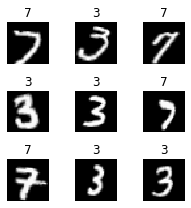

In [44]:
data.show_batch(rows=3, figsize=(3,3))

In [45]:
learn = cnn_learner(data, models.resnet18, metrics = accuracy)

In [46]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.205332,0.092711,0.966634,00:05
1,0.126029,0.053897,0.978410,00:05
2,0.100490,0.039019,0.987242,00:05
3,0.068465,0.026145,0.988224,00:05
4,0.048499,0.023275,0.992149,00:05
5,0.053917,0.017705,0.995093,00:05
6,0.042878,0.013701,0.993131,00:05
7,0.040114,0.013431,0.996565,00:05
8,0.036349,0.014664,0.995584,00:05
9,0.031383,0.010473,0.997056,00:05


In [21]:
learn.save('mnist-qs-1')

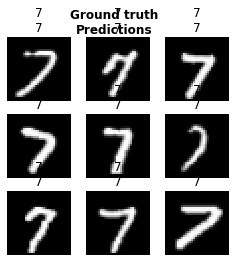

In [47]:
learn.show_results(ds_type=DatasetType.Valid, rows=3, figsize=(4,4))